# Muhammad Arham Adeel

### Pandas Assignemnt 4

# 16- Splitting a string into multiple columns

In [1]:
#import libraries

import pandas as pd

df = pd.DataFrame({"name":["Ahmad Raza","Ali Raza","Sajjad Ali","Abu Bakar"],
                  "Location":["Lahore, Pakistan","Sargodha, Pakistan","Karachi, Pakistan","Hamburg, Germany"]})
df

,name,Location
0,Ahmad Raza,"Lahore, Pakistan"
1,Ali Raza,"Sargodha, Pakistan"
2,Sajjad Ali,"Karachi, Pakistan"
3,Abu Bakar,"Hamburg, Germany"


In [2]:
## Splitting into two columns

df.name.str.split(" ")

0    [Ahmad, Raza]
1      [Ali, Raza]
2    [Sajjad, Ali]
3     [Abu, Bakar]
Name: name, dtype: object

In [3]:
## Adding those splits into new columns

df[["first_name","last_name"]] = df.name.str.split(" ",expand=True)

In [4]:
df

,name,Location,first_name,last_name
0,Ahmad Raza,"Lahore, Pakistan",Ahmad,Raza
1,Ali Raza,"Sargodha, Pakistan",Ali,Raza
2,Sajjad Ali,"Karachi, Pakistan",Sajjad,Ali
3,Abu Bakar,"Hamburg, Germany",Abu,Bakar


In [5]:

df[["city","country"]] = df.Location.str.split(", ",expand=True)

In [6]:
df

,name,Location,first_name,last_name,city,country
0,Ahmad Raza,"Lahore, Pakistan",Ahmad,Raza,Lahore,Pakistan
1,Ali Raza,"Sargodha, Pakistan",Ali,Raza,Sargodha,Pakistan
2,Sajjad Ali,"Karachi, Pakistan",Sajjad,Ali,Karachi,Pakistan
3,Abu Bakar,"Hamburg, Germany",Abu,Bakar,Hamburg,Germany


In [7]:
df = df[["first_name","last_name","city","country"]]
df

,first_name,last_name,city,country
0,Ahmad,Raza,Lahore,Pakistan
1,Ali,Raza,Sargodha,Pakistan
2,Sajjad,Ali,Karachi,Pakistan
3,Abu,Bakar,Hamburg,Germany


# 17 Aggregating by multiple groups/functions

In [8]:
#libraries

import pandas as pd
import seaborn as sns

# import data set

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
df.groupby("who").count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


In [10]:
df.groupby("sex").count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [11]:
df.groupby("who").head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [12]:
df.groupby("who").sum()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
who,,,,,,,,
child,49,218,528.67,144,105,2721.2210,0,6
man,88,1274,13700.50,159,82,13352.0656,537,410
woman,205,565,6976.00,163,153,12620.6627,0,121


In [13]:
len(df.sex)

891

In [14]:
len(df.groupby("who"))

3

In [15]:
len(df.groupby("sex"))

2

In [16]:
len(df.groupby("fare"))

248

In [17]:
len(df.groupby("pclass"))

3

In [18]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
df.groupby(["sex",'pclass',"who"])

In [20]:
df.groupby(["sex",'pclass',"who"]).count()

survived  age  sibsp  parch  fare  embarked  class  \
sex    pclass who                                                         
female 1      child         3    3      3      3     3         3      3   
              woman        91   82     91     91    91        89     91   
       2      child        10   10     10     10    10        10     10   
              woman        66   64     66     66    66        66     66   
       3      child        30   30     30     30    30        30     30   
              woman       114   72    114    114   114       114    114   
male   1      child         3    3      3      3     3         3      3   
              man         119   98    119    119   119       119    119   
       2      child         9    9      9      9     9         9      9   
              man          99   90     99     99    99        99     99   
       3      child        28   28     28     28    28        28     28   
              man         319  225    319    319   319       319    319   

                     adult_male  deck  embark_town  alive  alone  
sex    pclass who                                                 
female 1      child           3     3            3      3      3  
              woman          91    78           89     91     91  
       2      child          10     1           10     10     10  
              woman          66     9           66     66     66  
       3      child          30     2           30     30     30  
              woman         114     4          114    114    114  
male   1      child           3     3            3      3      3  
              man           119    91          119    119    119  
       2      child           9     3            9      9      9  
              man            99     3           99     99     99  
       3      child          28     1           28     28     28  
              man           319     5          319    319    319

In [22]:
df.groupby(["sex",'pclass',"adult_male"]).count()

survived  age  sibsp  parch  fare  embarked  class  \
sex    pclass adult_male                                                       
female 1      False             94   85     94     94    94        92     94   
       2      False             76   74     76     76    76        76     76   
       3      False            144  102    144    144   144       144    144   
male   1      False              3    3      3      3     3         3      3   
              True             119   98    119    119   119       119    119   
       2      False              9    9      9      9     9         9      9   
              True              99   90     99     99    99        99     99   
       3      False             28   28     28     28    28        28     28   
              True             319  225    319    319   319       319    319   

                          who  deck  embark_town  alive  alone  
sex    pclass adult_male                                        
female 1      False        94    81           92     94     94  
       2      False        76    10           76     76     76  
       3      False       144     6          144    144    144  
male   1      False         3     3            3      3      3  
              True        119    91          119    119    119  
       2      False         9     3            9      9      9  
              True         99     3           99     99     99  
       3      False        28     1           28     28     28  
              True        319     5          319    319    319

In [23]:
df.groupby(["sex",'pclass',"embarked"]).count()

survived  age  sibsp  parch  fare  class  who  \
sex    pclass embarked                                                  
female 1      C               43   38     43     43    43     43   43   
              Q                1    1      1      1     1      1    1   
              S               48   44     48     48    48     48   48   
       2      C                7    7      7      7     7      7    7   
              Q                2    1      2      2     2      2    2   
              S               67   66     67     67    67     67   67   
       3      C               23   16     23     23    23     23   23   
              Q               33   10     33     33    33     33   33   
              S               88   76     88     88    88     88   88   
male   1      C               42   36     42     42    42     42   42   
              Q                1    1      1      1     1      1    1   
              S               79   64     79     79    79     79   79   
       2      C               10    8     10     10    10     10   10   
              Q                1    1      1      1     1      1    1   
              S               97   90     97     97    97     97   97   
       3      C               43   25     43     43    43     43   43   
              Q               39   14     39     39    39     39   39   
              S              265  214    265    265   265    265  265   

                        adult_male  deck  embark_town  alive  alone  
sex    pclass embarked                                               
female 1      C                 43    35           43     43     43  
              Q                  1     1            1      1      1  
              S                 48    43           48     48     48  
       2      C                  7     1            7      7      7  
              Q                  2     1            2      2      2  
              S                 67     8           67     67     67  
       3      C                 23     1           23     23     23  
              Q                 33     0           33     33     33  
              S                 88     5           88     88     88  
male   1      C                 42    31           42     42     42  
              Q                  1     1            1      1      1  
              S                 79    62           79     79     79  
       2      C                 10     1           10     10     10  
              Q                  1     0            1      1      1  
              S                 97     5           97     97     97  
       3      C                 43     0           43     43     43  
              Q                 39     1           39     39     39  
              S                265     5          265    265    265

# 18- Selct specific rows or columns

In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
#Select multiple columns

df[["sex","survived","class"]]

,sex,survived,class
0,male,0,Third
1,female,1,First
2,female,1,Third
3,female,1,First
4,male,0,Third
...,...,...,...
886,male,0,Second
887,female,1,First
888,female,0,Third
889,male,1,First


In [27]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Select specific rows

In [29]:
df.describe().loc[["min","25%","50%","75%","max"]]

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [32]:
df.describe().loc["mean":"max"]

,survived,pclass,age,sibsp,parch,fare
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
df.describe().loc["mean":"max", : ]

,survived,pclass,age,sibsp,parch,fare
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
df.describe().loc["mean":"max" , "survived"]

mean    0.383838
std     0.486592
min     0.000000
25%     0.000000
50%     0.000000
75%     1.000000
max     1.000000
Name: survived, dtype: float64

In [35]:
df.describe().loc["mean":"max" , ["survived","age"]]

,survived,age
mean,0.383838,29.699118
std,0.486592,14.526497
min,0.000000,0.420000
25%,0.000000,20.125000
50%,0.000000,28.000000
75%,1.000000,38.000000
max,1.000000,80.000000


In [39]:
df.describe().loc["min":"max" , "survived":"age"]

,survived,pclass,age
min,0.0,1.0,0.420
25%,0.0,2.0,20.125
50%,0.0,3.0,28.000
75%,1.0,3.0,38.000
max,1.0,3.0,80.000


# 19- Reshape multiindex series

In [40]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
df.survived.mean()

0.3838383838383838

In [42]:
df.groupby("sex").survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [46]:
df.groupby(["sex",'class']).survived.mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [47]:
df.groupby(["sex",'class']).survived.mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# 20- Continous to categorical data conversion

In [50]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [51]:
df.age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

#### Creating bins

In [52]:
pd.cut(df.age , bins = [0,18,25,99], labels = ["chuld","young_adult","adult"])

0      young_adult
1            adult
2            adult
3            adult
4            adult
          ...     
886          adult
887    young_adult
888            NaN
889          adult
890          adult
Name: age, Length: 891, dtype: category
Categories (3, object): ['chuld' < 'young_adult' < 'adult']

In [53]:
df["new_age"] = pd.cut(df.age , bins = [0,18,25,99], labels = ["chuld","young_adult","adult"])

In [55]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young_adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


# 21- Convert One set of value into another one

In [56]:
df.sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [57]:
df.sex.map({"male":0,"female":1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: sex, Length: 891, dtype: int64

In [58]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young_adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


In [59]:
df["sex_number"] =  df.sex.map({"male":0,"female":1})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,sex_number
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young_adult,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,0


In [60]:
df.embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: embarked, dtype: object

In [61]:
df.embarked.count()

889

In [62]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [63]:
df.embarked.factorize()[0]

array([ 0,  1,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  1,  0,  0,  2,  0,  0,  0,  1,  0,  2,  0,  1,  1,  2,  0,
        1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  2,  0,  2,  2,  1,  0,  0,
        0,  1,  0,  1,  0,  0,  1,  0,  0,  1, -1,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,  1,  0,  2,  0,  1,
        0,  0,  0,  1,  0,  0,  1,  2,  0,  1,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  2,
        0,  2,  0,  0,  0,  0,  0,  1,  1,  2,  0,  2,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  2,  1,  0,  0,  0,  0,  2,  1,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0

In [66]:
df["embarked_num"] = df.embarked.factorize()[0]
df.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,sex_number,embarked_num
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,adult,1,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,1,0
315,1,3,female,26.0,0,0,7.8542,S,Third,woman,False,NaN,Southampton,yes,True,adult,1,0
340,1,2,male,2.0,1,1,26.0000,S,Second,child,False,F,Southampton,yes,False,chuld,0,0
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True,young_adult,0,1
503,0,3,female,37.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,no,True,adult,1,0
541,0,3,female,9.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False,chuld,1,0
613,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True,NaN,0,2
557,0,1,male,NaN,0,0,227.5250,C,First,man,True,NaN,Cherbourg,no,True,NaN,0,1
365,0,3,male,30.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True,adult,0,0


# 22- Transpose a wide dataframe

In [67]:
import numpy as np
import pandas as pd

In [72]:
## Creating a new data df

df = pd.DataFrame(np.random.randn(200,26) , columns = list("qwertyuiopasdfghjklzxcvbnm"))

In [73]:
df

,q,w,e,r,t,y,u,i,o,p,...,j,k,l,z,x,c,v,b,n,m
0,0.860929,-0.422272,0.020497,0.448266,0.679817,1.221083,0.249258,-0.634501,0.211465,-0.291075,...,-0.050413,-0.071923,-0.188674,0.357784,-1.513362,-0.368595,-2.048889,-0.535700,-0.925391,-2.042446
1,0.829879,-1.873474,1.158072,-1.659237,-1.129361,-0.149909,-1.767549,-1.625943,-0.606103,-0.264948,...,0.063337,-1.178189,0.577061,-1.761496,0.962438,1.308206,0.394793,0.686961,1.067398,-1.961124
2,-0.325454,0.811925,-0.479030,0.525105,-0.196639,0.978271,1.355286,0.218035,0.017941,0.030741,...,-2.416455,1.713087,0.137685,0.669390,-0.816145,-0.423777,-1.177218,0.456387,-0.032551,0.420746
3,0.148398,-0.075814,1.203942,1.438677,-0.580375,-0.051865,0.404960,-1.399807,1.314730,-1.380900,...,-1.065507,0.888191,-0.196177,2.400347,0.182792,-1.102555,0.274522,-0.126636,-0.273617,-0.801125
4,0.843806,0.797779,-3.446544,0.013469,0.933809,1.373676,0.951747,0.285639,0.185692,-1.141884,...,-0.146258,-0.429759,1.287033,0.136786,-1.537805,0.589601,-0.341386,1.214722,-0.541988,0.803773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.341151,0.535581,-1.114357,-0.907603,-0.195833,-0.668891,1.665566,0.768435,0.819483,-1.136243,...,-1.017663,-0.999088,0.921755,-1.378467,0.267719,-0.706459,0.322483,-0.702294,-0.543999,0.248451
196,-2.649286,-0.766690,-1.475859,-0.442724,1.119541,1.306879,0.228675,-0.075692,0.469634,1.052017,...,-0.187678,-0.224542,1.685128,-1.199540,-1.199526,1.574952,0.219706,0.694809,1.533875,-1.624493
197,-0.665984,1.754397,1.144136,-0.008428,-0.913257,0.137203,-0.533819,-1.485715,-0.273236,1.539632,...,0.293144,1.017885,-0.123171,0.220338,-0.252733,-0.808445,-1.761049,-1.088427,0.193357,-0.720007
198,-0.674781,-1.623320,0.645890,-0.448712,1.728253,1.513538,-0.051213,0.536655,-0.103581,-0.019373,...,0.141805,-0.736545,1.549939,0.771956,1.262767,-0.196026,1.171864,0.329783,-0.752179,0.385238


In [74]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
q,0.860929,0.829879,-0.325454,0.148398,0.843806,-0.836928,0.857955,-1.090673,0.311932,-1.193549
w,-0.422272,-1.873474,0.811925,-0.075814,0.797779,1.039998,0.047331,-0.334624,0.271452,-1.045306
e,0.020497,1.158072,-0.479030,1.203942,-3.446544,-0.331430,-0.209746,0.233499,0.527284,1.383224
r,0.448266,-1.659237,0.525105,1.438677,0.013469,-1.261569,0.862893,2.399032,0.915732,-0.647739
t,0.679817,-1.129361,-0.196639,-0.580375,0.933809,0.280298,-0.209187,-0.046094,0.595018,0.671134
y,1.221083,-0.149909,0.978271,-0.051865,1.373676,0.006581,2.438159,1.084575,0.078342,-1.358754
u,0.249258,-1.767549,1.355286,0.404960,0.951747,-0.828917,-0.438498,-0.130721,-1.772710,0.165067
i,-0.634501,-1.625943,0.218035,-1.399807,0.285639,0.090071,-1.841023,-0.689875,-0.595815,0.344743
o,0.211465,-0.606103,0.017941,1.314730,0.185692,-0.282810,0.108063,0.719983,0.950226,-1.255131
p,-0.291075,-0.264948,0.030741,-1.380900,-1.141884,2.352868,-2.569475,-0.661953,0.273885,-0.673165


In [75]:
df.describe()

,q,w,e,r,t,y,u,i,o,p,...,j,k,l,z,x,c,v,b,n,m
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.004673,0.018772,0.039674,0.012617,0.082254,0.084839,0.164849,-0.061911,0.020212,0.074786,...,-0.028413,-0.019557,-0.051063,0.038291,-0.011170,0.046909,-0.121012,-0.080741,0.028857,-0.084792
std,0.917580,1.052176,0.921840,1.059716,1.025368,0.982898,0.965199,0.999364,1.044556,1.081455,...,1.024442,0.962635,0.960152,0.908874,1.070028,1.018258,0.992510,0.925061,0.932377,0.981641
min,-2.649286,-2.892928,-3.446544,-2.540224,-2.532110,-2.559431,-2.444974,-2.557536,-3.274365,-2.569475,...,-2.969543,-2.477311,-2.754323,-2.186552,-3.061036,-2.376317,-3.235516,-2.548192,-3.835888,-3.107319
25%,-0.604102,-0.730489,-0.580921,-0.651669,-0.586947,-0.563023,-0.468418,-0.774389,-0.648145,-0.675112,...,-0.676920,-0.768106,-0.661846,-0.567127,-0.783286,-0.650051,-0.812055,-0.764804,-0.542490,-0.777946
50%,0.016575,0.050422,0.163725,-0.065551,0.036348,0.145551,0.134240,-0.036811,0.055269,-0.000076,...,-0.063984,-0.044676,-0.111238,0.020414,0.070088,0.114652,-0.100058,-0.028755,0.021039,-0.052062
75%,0.679821,0.834223,0.665808,0.721915,0.734985,0.731491,0.860467,0.632254,0.696263,0.860074,...,0.597996,0.698053,0.650405,0.667316,0.693684,0.760701,0.482884,0.688738,0.691894,0.587974
max,2.502143,2.639051,2.071430,3.241708,2.638099,2.764959,2.766000,2.522643,3.360045,3.051083,...,2.640043,2.614434,2.135564,2.635373,2.671640,2.782484,2.982865,2.160829,2.369067,2.251279


In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
q,200.0,0.004673,0.917580,-2.649286,-0.604102,0.016575,0.679821,2.502143
w,200.0,0.018772,1.052176,-2.892928,-0.730489,0.050422,0.834223,2.639051
e,200.0,0.039674,0.921840,-3.446544,-0.580921,0.163725,0.665808,2.071430
r,200.0,0.012617,1.059716,-2.540224,-0.651669,-0.065551,0.721915,3.241708
t,200.0,0.082254,1.025368,-2.532110,-0.586947,0.036348,0.734985,2.638099
y,200.0,0.084839,0.982898,-2.559431,-0.563023,0.145551,0.731491,2.764959
u,200.0,0.164849,0.965199,-2.444974,-0.468418,0.134240,0.860467,2.766000
i,200.0,-0.061911,0.999364,-2.557536,-0.774389,-0.036811,0.632254,2.522643
o,200.0,0.020212,1.044556,-3.274365,-0.648145,0.055269,0.696263,3.360045
p,200.0,0.074786,1.081455,-2.569475,-0.675112,-0.000076,0.860074,3.051083


#### here i can save the transpose data

In [77]:
df.describe().T.to_csv("transpose.csv")

# 23- Reshaping a dataframe

In [89]:
fasla = pd.DataFrame([["12345",100,200,300],["34567",400,500,600],['67890',700,800,900]],
                     columns = ["zip","factory","warehouse","retail"])
fasla

,zip,factory,warehouse,retail
0,12345,100,200,300
1,34567,400,500,600
2,67890,700,800,900


In [90]:
fasla.T

,0,1,2
zip,12345,34567,67890
factory,100,400,700
warehouse,200,500,800
retail,300,600,900


Another method to transpose

In [91]:
fasla2 = pd.DataFrame([[1,"12345","factory"],[2,"34567","warehosue"]],
                     columns = ["user_id","zip","location_type"])
fasla2

,user_id,zip,location_type
0,1,12345,factory
1,2,34567,warehosue


In [92]:
fasla_long= fasla.melt(id_vars = "zip",var_name = "location_type", value_name = "distance")
fasla_long

,zip,location_type,distance
0,12345,factory,100
1,34567,factory,400
2,67890,factory,700
3,12345,warehouse,200
4,34567,warehouse,500
5,67890,warehouse,800
6,12345,retail,300
7,34567,retail,600
8,67890,retail,900


<AxesSubplot:xlabel='location_type', ylabel='distance'>

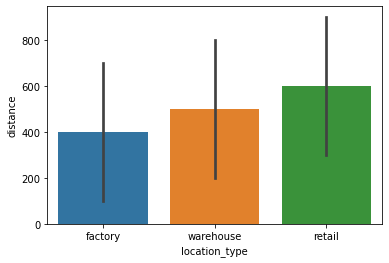

In [93]:
sns.barplot(x="location_type",y = "distance", data= fasla_long)

<AxesSubplot:xlabel='zip', ylabel='distance'>

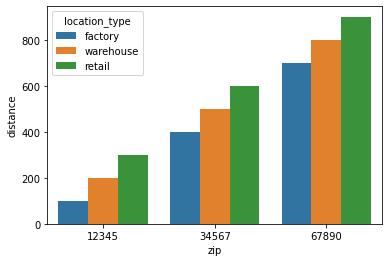

In [94]:
sns.barplot(x="zip",y = "distance", hue="location_type" ,data= fasla_long)

<AxesSubplot:xlabel='zip', ylabel='warehouse'>

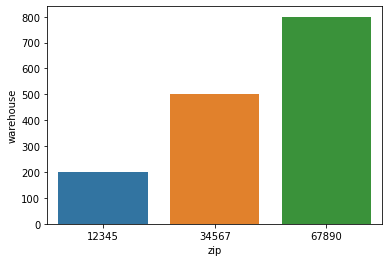

In [95]:
sns.barplot(x="zip",y = "warehouse", data= fasla)

<AxesSubplot:xlabel='zip', ylabel='factory'>

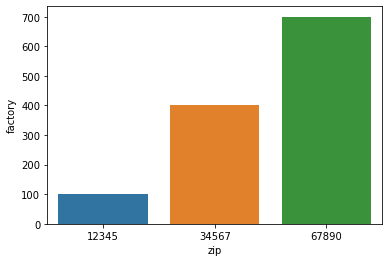

In [96]:
sns.barplot(x="zip",y = "factory", data= fasla)